In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import vice
import sys
sys.path.append("../")
from vice_utils import calculate_z, sample_stars, filter_stars, show_stars, R_to_zone, zone_to_R, show_at_R_z
from imp import reload
import vice_utils
from yields import y_c_agb
import warnings

In [ ]:
def infall_rate(t):
    delta_t = 1
    delta_M = 5*10**9
    t0 = 5
    if (t0 <= t and t < t0 + delta_t):
        return 9.1 + delta_M/delta_t/10**9
    else:
        return 9.1

example = vice.singlezone(name="gas-burst", func=infall_rate, mode="ifr", dt=0.001, elements=("n", "o", "fe", "c"))
example.run(np.linspace(0, 10, 1001), overwrite=True)
gas_burst = vice.output("gas-burst")

gas_burst.show("[o/fe]-[fe/h]")
gas_burst.show("dn/d[o/fe]")
gas_burst.show("sfr")

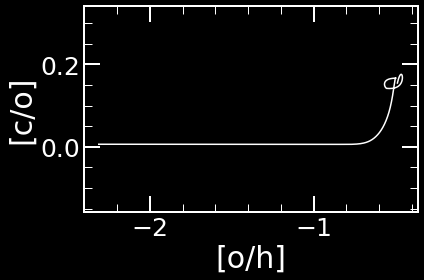

In [26]:
gas_burst.show("[c/o]-[o/h]")

In [ ]:
vice.yields.agb.settings["c"] = "karakas10"
def infall_rate(t):
    return 10*np.exp(-t/5)

In [4]:
def plot_cooh_sfh():
    for tau_sfh in (2.5, 5, 10):
        def infall_rate(t):
            return 10*np.exp(-t/tau_sfh)
        example = vice.singlezone(name="exp-decline", func=infall_rate, mode="ifr", dt=0.001, elements=("n", "o", "fe", "c"))
        example.run(np.linspace(0, 10, 1001), overwrite=True)
        exp_decline = vice.output("exp-decline")

        plt.plot(exp_decline.history["[o/h]"], exp_decline.history["[c/o]"], label=tau_sfh)
    
    plt.xlabel("[o/h]")
    plt.ylabel("[c/o]")
    plt.legend(title="tau_sfh")

/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/pickles.py:313: UserWarning: Encoding functions along with VICE outputs requires the package dill (installable via pip). The following attribute will not be saved with this output: func
  output: %s""" % (self.name), UserWarning)


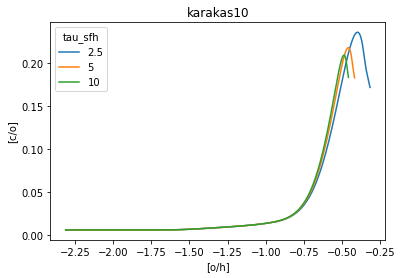

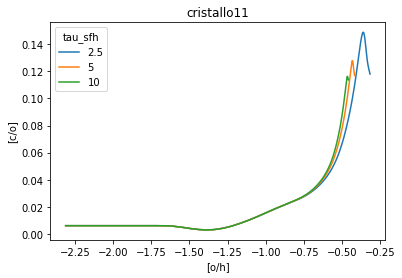

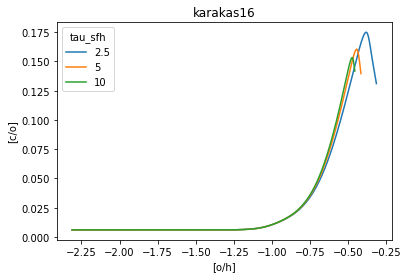

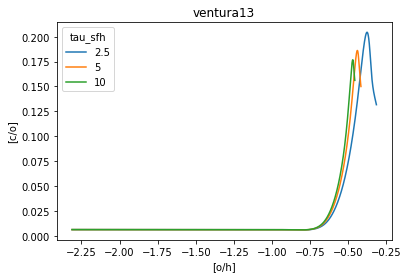

TypeError: Functional AGB star yield settings must be either a callable function accepting two numerical parameters or a
string denoting an AGB star yield study.

In [13]:
for model in ["karakas10", "cristallo11", "karakas16", "ventura13"]:
    vice.yields.agb.settings["c"] = model
    plt.title(model)
    plot_cooh_sfh()
    plt.show()

/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/singlezone/singlezone.py:1779: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  overwrite = overwrite)
/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/pickles.py:313: UserWarning: Encoding functions along with VICE outputs requires the package dill (installable via pip). The following attribute will not be saved with this output: c
  output: %s""" % (self.name), UserWarning)
/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/pickles.py:313: UserWarning: Encoding functions along with VICE outputs requires the package dill (installable via pip). The following attribute will not be saved with this output: func
  output: %s""" % (self.name), UserWarning)
/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/outputs/output.py:131:

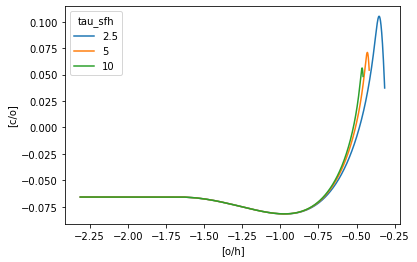

In [5]:
vice.yields.agb.settings["c"] = y_c_agb()
plot_cooh_sfh()
plt.show()

In [ ]:
def plot_example(**kwargs):
    example = vice.singlezone(name="exp-decline", func=infall_rate, mode="ifr", dt=0.001, elements=("n", "o", "fe", "c"))
    example.run(np.linspace(0, 10, 1001), overwrite=True)
    exp_decline = vice.output("exp-decline")
    plt.plot(exp_decline.history["[o/h]"], exp_decline.history["[c/o]"], **kwargs)

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for alpha in [10,20,40]:
        vice.yields.agb.settings["c"] = y_c_agb(alpha=alpha)
        plot_example(label=alpha)
    plt.legend()
    plt.show()

In [ ]:
for model in ["karakas10", "karakas16", "cristallo11", "ventura13"]:
    vice.yields.agb.settings["c"] = model
    m_c, times = vice.single_stellar_population("c")
    plt.plot(times, np.array(m_c)/m_c[-1], label=model)
plt.xscale("log")
plt.yscale("log")
plt.legend()


(0.7, 1.0694517679308133)

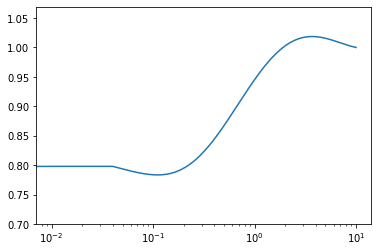

In [8]:
vice.yields.agb.settings['c'] = y_c_agb()
m_c, times = vice.single_stellar_population("c")
plt.plot(times, np.array(m_c)/m_c[-1])
plt.xscale("log")
plt.ylim(0.7)

In [18]:
y_c_agb()

<function yields.y_c_agb.<locals>.model(mass, Z)>